In [1]:
%matplotlib inline

### 导入
习惯上，我们这样导入pandas:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 创建对象
通过列表可以创建Series，Pandas会自动创建整型索引。

In [3]:
s=pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


通过NumPy的数组可以创建一个DataFrame。

In [4]:
dates=pd.date_range('20130101',periods=6)
print(dates)
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01 -0.653658 -0.412076  0.289240 -0.813057
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191
2013-01-03  0.404230 -0.880146 -1.593526  1.141695
2013-01-04  0.100815  1.143710  0.467192  0.014952
2013-01-05  0.944031 -0.653508  0.005439  0.316151
2013-01-06 -0.305994 -1.372941 -2.900295  0.220700


也可以通过字典来创建DataFrame

In [5]:
df2=pd.DataFrame({'A':1.,
                 'B':pd.Timestamp('20130102'),
                 'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                 'D':np.array([3]*4,dtype='int32'),
                 'E':pd.Categorical(['test','train','test','train']),
                 'F':'foo'})
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


设置了特定的dtypes

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 查看数据
查看数据的顶部和底部

In [7]:
print(df.head())
print(df.tail(3))

                   A         B         C         D
2013-01-01 -0.653658 -0.412076  0.289240 -0.813057
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191
2013-01-03  0.404230 -0.880146 -1.593526  1.141695
2013-01-04  0.100815  1.143710  0.467192  0.014952
2013-01-05  0.944031 -0.653508  0.005439  0.316151
                   A         B         C         D
2013-01-04  0.100815  1.143710  0.467192  0.014952
2013-01-05  0.944031 -0.653508  0.005439  0.316151
2013-01-06 -0.305994 -1.372941 -2.900295  0.220700


查看索引，列名，以及纯的NumPy数据

In [8]:
print(df.index)
print(df.columns)
print(df.values)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[ -6.53658042e-01  -4.12076297e-01   2.89239645e-01  -8.13057346e-01]
 [ -2.86361403e-04  -1.25775963e+00  -1.23254938e+00  -8.99191307e-01]
 [  4.04229751e-01  -8.80146291e-01  -1.59352637e+00   1.14169486e+00]
 [  1.00815285e-01   1.14370966e+00   4.67192499e-01   1.49516032e-02]
 [  9.44030631e-01  -6.53507646e-01   5.43886068e-03   3.16151200e-01]
 [ -3.05994200e-01  -1.37294092e+00  -2.90029481e+00   2.20700202e-01]]


```DataFrame.describe()```提供了便捷的数据统计

In [9]:
print(df.describe())

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.081523 -0.572120 -0.827417 -0.003125
std    0.556019  0.914615  1.316394  0.764447
min   -0.653658 -1.372941 -2.900295 -0.899191
25%   -0.229567 -1.163356 -1.503282 -0.606055
50%    0.050264 -0.766827 -0.613555  0.117826
75%    0.328376 -0.472434  0.218289  0.292288
max    0.944031  1.143710  0.467192  1.141695


转置矩阵

In [10]:
print(df.T)

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.653658   -0.000286    0.404230    0.100815    0.944031   -0.305994
B   -0.412076   -1.257760   -0.880146    1.143710   -0.653508   -1.372941
C    0.289240   -1.232549   -1.593526    0.467192    0.005439   -2.900295
D   -0.813057   -0.899191    1.141695    0.014952    0.316151    0.220700


沿某一轴排序

In [11]:
print(df.sort_index(axis=1,ascending=False))

                   D         C         B         A
2013-01-01 -0.813057  0.289240 -0.412076 -0.653658
2013-01-02 -0.899191 -1.232549 -1.257760 -0.000286
2013-01-03  1.141695 -1.593526 -0.880146  0.404230
2013-01-04  0.014952  0.467192  1.143710  0.100815
2013-01-05  0.316151  0.005439 -0.653508  0.944031
2013-01-06  0.220700 -2.900295 -1.372941 -0.305994


按照值进行排序

In [12]:
print(df.sort_values(by='B'))

                   A         B         C         D
2013-01-06 -0.305994 -1.372941 -2.900295  0.220700
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191
2013-01-03  0.404230 -0.880146 -1.593526  1.141695
2013-01-05  0.944031 -0.653508  0.005439  0.316151
2013-01-01 -0.653658 -0.412076  0.289240 -0.813057
2013-01-04  0.100815  1.143710  0.467192  0.014952


### 数据选择
**注意：**尽管Python标准库和NumPy的语句在选择和设置数据时更直观和方便交互。但是在生产环境中，我们更建议使用Pandas的数据访问函数：```.at, .iat, .loc, .iloc, .ix```

#### 数据获取
选择一列，返回Series。等同于df.A

In [13]:
df['A']

2013-01-01   -0.653658
2013-01-02   -0.000286
2013-01-03    0.404230
2013-01-04    0.100815
2013-01-05    0.944031
2013-01-06   -0.305994
Freq: D, Name: A, dtype: float64

使用```[]```来切分多行数据

In [14]:
print(df[0:3])
print(df['20130102':'20130104'])

                   A         B         C         D
2013-01-01 -0.653658 -0.412076  0.289240 -0.813057
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191
2013-01-03  0.404230 -0.880146 -1.593526  1.141695
                   A         B         C         D
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191
2013-01-03  0.404230 -0.880146 -1.593526  1.141695
2013-01-04  0.100815  1.143710  0.467192  0.014952


#### 根据标签选择
使用标签来得到特定的一行

In [15]:
df.loc[dates[0]]

A   -0.653658
B   -0.412076
C    0.289240
D   -0.813057
Name: 2013-01-01 00:00:00, dtype: float64

使用标签来得到多个指定的列

In [16]:
print(df.loc[:,['A','B']])

                   A         B
2013-01-01 -0.653658 -0.412076
2013-01-02 -0.000286 -1.257760
2013-01-03  0.404230 -0.880146
2013-01-04  0.100815  1.143710
2013-01-05  0.944031 -0.653508
2013-01-06 -0.305994 -1.372941


用标签来切片时，端点的值都是被包含在内的

In [17]:
print(df.loc['20130102':'20130104',['A','B']])

                   A         B
2013-01-02 -0.000286 -1.257760
2013-01-03  0.404230 -0.880146
2013-01-04  0.100815  1.143710


选择的返回值可以降低维度

In [18]:
df.loc['20130102',['A','B']]

A   -0.000286
B   -1.257760
Name: 2013-01-02 00:00:00, dtype: float64

选择一个标量

In [19]:
df.loc[dates[0],'A']

-0.65365804231862046

快速获取一个标量（与上面相同）

In [20]:
df.at[dates[0],'A']

-0.65365804231862046

#### 根据位置进行选择
根据整数下标来选择数据

In [21]:
df.iloc[3]

A    0.100815
B    1.143710
C    0.467192
D    0.014952
Name: 2013-01-04 00:00:00, dtype: float64

用整数来切片，类似于Python标准库和NumPy

In [22]:
print(df.iloc[3:5,0:2])

                   A         B
2013-01-04  0.100815  1.143710
2013-01-05  0.944031 -0.653508


用整数列表来进行选择，与Python标准库和NumPy类似

In [23]:
print(df.iloc[[1,2,4],[0,2]])

                   A         C
2013-01-02 -0.000286 -1.232549
2013-01-03  0.404230 -1.593526
2013-01-05  0.944031  0.005439


对行进行切片选择

In [24]:
print(df.iloc[1:3,:])

                   A         B         C         D
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191
2013-01-03  0.404230 -0.880146 -1.593526  1.141695


对列进行切片选择

In [25]:
print(df.iloc[:,1:3])

                   B         C
2013-01-01 -0.412076  0.289240
2013-01-02 -1.257760 -1.232549
2013-01-03 -0.880146 -1.593526
2013-01-04  1.143710  0.467192
2013-01-05 -0.653508  0.005439
2013-01-06 -1.372941 -2.900295


获取某个标量

In [26]:
df.iloc[1,1]

-1.257759630175423

快速地获取某个标量（与上面的函数相同）

In [27]:
df.iat[1,1]

-1.257759630175423

#### 布尔索引
使用某列值来选择数据

In [28]:
print(df[df.A>0])

                   A         B         C         D
2013-01-03  0.404230 -0.880146 -1.593526  1.141695
2013-01-04  0.100815  1.143710  0.467192  0.014952
2013-01-05  0.944031 -0.653508  0.005439  0.316151


从DataFrame中选择满足某条件的数据

In [29]:
print(df[df>0])

                   A        B         C         D
2013-01-01       NaN      NaN  0.289240       NaN
2013-01-02       NaN      NaN       NaN       NaN
2013-01-03  0.404230      NaN       NaN  1.141695
2013-01-04  0.100815  1.14371  0.467192  0.014952
2013-01-05  0.944031      NaN  0.005439  0.316151
2013-01-06       NaN      NaN       NaN  0.220700


使用```isin()```函数来过滤数据

In [30]:
df2=df.copy()
df2['E']=['one','one','two','three','four','three']
print(df2)
print(df2[df2['E'].isin(['two','four'])])

                   A         B         C         D      E
2013-01-01 -0.653658 -0.412076  0.289240 -0.813057    one
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191    one
2013-01-03  0.404230 -0.880146 -1.593526  1.141695    two
2013-01-04  0.100815  1.143710  0.467192  0.014952  three
2013-01-05  0.944031 -0.653508  0.005439  0.316151   four
2013-01-06 -0.305994 -1.372941 -2.900295  0.220700  three
                   A         B         C         D     E
2013-01-03  0.404230 -0.880146 -1.593526  1.141695   two
2013-01-05  0.944031 -0.653508  0.005439  0.316151  four


#### 设置数据
设置一个新列并设置索引

In [31]:
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
df['F']=s1
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

根据标签来设置值

In [32]:
df.at[dates[0],'A']=0
print(df)

                   A         B         C         D    F
2013-01-01  0.000000 -0.412076  0.289240 -0.813057  NaN
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191  1.0
2013-01-03  0.404230 -0.880146 -1.593526  1.141695  2.0
2013-01-04  0.100815  1.143710  0.467192  0.014952  3.0
2013-01-05  0.944031 -0.653508  0.005439  0.316151  4.0
2013-01-06 -0.305994 -1.372941 -2.900295  0.220700  5.0


根据位置的来设置值

In [33]:
df.iat[0,1]=0
print(df)

                   A         B         C         D    F
2013-01-01  0.000000  0.000000  0.289240 -0.813057  NaN
2013-01-02 -0.000286 -1.257760 -1.232549 -0.899191  1.0
2013-01-03  0.404230 -0.880146 -1.593526  1.141695  2.0
2013-01-04  0.100815  1.143710  0.467192  0.014952  3.0
2013-01-05  0.944031 -0.653508  0.005439  0.316151  4.0
2013-01-06 -0.305994 -1.372941 -2.900295  0.220700  5.0


使用NumPy数组来赋值

In [34]:
df.loc[:,'D']=np.array([5]*len(df))
print(df)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.289240  5  NaN
2013-01-02 -0.000286 -1.257760 -1.232549  5  1.0
2013-01-03  0.404230 -0.880146 -1.593526  5  2.0
2013-01-04  0.100815  1.143710  0.467192  5  3.0
2013-01-05  0.944031 -0.653508  0.005439  5  4.0
2013-01-06 -0.305994 -1.372941 -2.900295  5  5.0


在过滤的同时进行赋值

In [35]:
df2=df.copy()
df2[df2>0]=-df2
print(df2)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.289240 -5  NaN
2013-01-02 -0.000286 -1.257760 -1.232549 -5 -1.0
2013-01-03 -0.404230 -0.880146 -1.593526 -5 -2.0
2013-01-04 -0.100815 -1.143710 -0.467192 -5 -3.0
2013-01-05 -0.944031 -0.653508 -0.005439 -5 -4.0
2013-01-06 -0.305994 -1.372941 -2.900295 -5 -5.0


### 处理缺失数据
Pandas主要使用```np.nan```来表示缺失数据。这个值不会加入在计算中。
重新索引允许你对某一轴的索引进行更改/添加/删除操作。这会返回操作数据的拷贝对象。

In [36]:
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
print(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.289240  5  NaN  1.0
2013-01-02 -0.000286 -1.257760 -1.232549  5  1.0  1.0
2013-01-03  0.404230 -0.880146 -1.593526  5  2.0  NaN
2013-01-04  0.100815  1.143710  0.467192  5  3.0  NaN


删除含有缺失数据的行

In [37]:
print(df1.dropna(how='any'))

                   A        B         C  D    F    E
2013-01-02 -0.000286 -1.25776 -1.232549  5  1.0  1.0


填充缺失数据

In [38]:
print(df1.fillna(value=5))

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.289240  5  5.0  1.0
2013-01-02 -0.000286 -1.257760 -1.232549  5  1.0  1.0
2013-01-03  0.404230 -0.880146 -1.593526  5  2.0  5.0
2013-01-04  0.100815  1.143710  0.467192  5  3.0  5.0


获取数据中是```nan```的位置

In [39]:
print(pd.isnull(df1))

                A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True


### 基础操作
#### 基本的统计
操作默认排除了缺失的数据  
执行一个描述性的统计

In [40]:
df.mean()

A    0.190466
B   -0.503441
C   -0.827417
D    5.000000
F    3.000000
dtype: float64

在另外的轴执行该操作

In [41]:
df.mean(1)

2013-01-01    1.322310
2013-01-02    0.701881
2013-01-03    0.986111
2013-01-04    1.942343
2013-01-05    1.859192
2013-01-06    1.084154
Freq: D, dtype: float64

对不同维度数据的操作需要进行校准。Pandas会自动的在指定的维数上应用广播。

In [42]:
s=pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
print(s)
print(df.sub(s,axis='index'))

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64
                   A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -0.595770 -1.880146 -2.593526  4.0  1.0
2013-01-04 -2.899185 -1.856290 -2.532808  2.0  0.0
2013-01-05 -4.055969 -5.653508 -4.994561  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN


#### 应用函数
对数据应用函数

In [43]:
print(df.apply(np.cumsum))
df.apply(lambda x:x.max()-x.min())

                   A         B         C   D     F
2013-01-01  0.000000  0.000000  0.289240   5   NaN
2013-01-02 -0.000286 -1.257760 -0.943310  10   1.0
2013-01-03  0.403943 -2.137906 -2.536836  15   3.0
2013-01-04  0.504759 -0.994196 -2.069644  20   6.0
2013-01-05  1.448789 -1.647704 -2.064205  25  10.0
2013-01-06  1.142795 -3.020645 -4.964500  30  15.0


A    1.250025
B    2.516651
C    3.367487
D    0.000000
F    4.000000
dtype: float64

#### 直方图

In [44]:
s=pd.Series(np.random.randint(0,7,size=10))
print(s)
print(s.value_counts())

0    0
1    0
2    4
3    1
4    6
5    6
6    4
7    3
8    5
9    1
dtype: int32
6    2
4    2
1    2
0    2
5    1
3    1
dtype: int64


#### 字符串函数
在下面的代码中，Series可以在```str```属性中应用许多字符处理函数，可以更方便的处理数据中的每个元素。需要注意的是模式识别默认使用正则表达式。

In [45]:
s=pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 数据合并
#### 数据拼接
Pandas提供了许多工具来根据索引逻辑和线性代数关系组合Series、DataFrame和Panel。
用```concat()```组合Pandas数据

In [46]:
df=pd.DataFrame(np.random.randn(10,4))
print(df)
pieces=[df[:3],df[3:7],df[7:]]
print(pd.concat(pieces))

          0         1         2         3
0  0.868667 -1.127783 -1.339226 -0.018955
1  2.154827 -0.183290  0.346383 -0.535674
2  0.539159  0.598349 -0.959137 -1.371542
3  0.526160 -0.675516  0.329515  2.741801
4 -0.672261  0.277084  0.246108 -0.058672
5  1.345204  0.267244 -0.976797  0.258268
6 -1.134643  0.736464  0.632367  0.355589
7 -0.388383  0.573309 -0.920222  1.232245
8 -0.394164 -0.492838 -0.036512  0.965029
9 -0.219411  1.003898 -0.033570  1.059801
          0         1         2         3
0  0.868667 -1.127783 -1.339226 -0.018955
1  2.154827 -0.183290  0.346383 -0.535674
2  0.539159  0.598349 -0.959137 -1.371542
3  0.526160 -0.675516  0.329515  2.741801
4 -0.672261  0.277084  0.246108 -0.058672
5  1.345204  0.267244 -0.976797  0.258268
6 -1.134643  0.736464  0.632367  0.355589
7 -0.388383  0.573309 -0.920222  1.232245
8 -0.394164 -0.492838 -0.036512  0.965029
9 -0.219411  1.003898 -0.033570  1.059801


#### 数据关联
SQL形式

In [47]:
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
print(left)
print(right)
print(pd.merge(left,right,on='key'))

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5
   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


In [48]:
left=pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
print(left)
print(right)
print(pd.merge(left,right,on='key'))

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5
   key  lval  rval
0  foo     1     4
1  bar     2     5


#### 添加数据（Append）
给DataFrame添加行

In [49]:
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
print(df)
s=df.iloc[3]
print(df.append(s,ignore_index=True))

          A         B         C         D
0 -0.379925 -1.017542 -0.189007 -0.428325
1 -0.276408 -0.715901 -1.319698 -0.222887
2  1.107723  0.353094  0.815195 -1.440487
3 -0.033881  0.514738  0.290243 -0.573637
4  0.425776 -0.074674 -0.002662  0.963586
5  1.982210  1.058390 -0.605711  0.338158
6  0.444923  0.802376  1.287365 -0.076757
7  1.079877  0.937892  1.511644 -1.344911
          A         B         C         D
0 -0.379925 -1.017542 -0.189007 -0.428325
1 -0.276408 -0.715901 -1.319698 -0.222887
2  1.107723  0.353094  0.815195 -1.440487
3 -0.033881  0.514738  0.290243 -0.573637
4  0.425776 -0.074674 -0.002662  0.963586
5  1.982210  1.058390 -0.605711  0.338158
6  0.444923  0.802376  1.287365 -0.076757
7  1.079877  0.937892  1.511644 -1.344911
8 -0.033881  0.514738  0.290243 -0.573637


### 分组
分组包含以下的一个或多个流程：
 - 分组 根据某种标准分组数据
 - 应用 对每个组应用一个函数
 - 组合 把分组的结果组合成一个整体结构

In [50]:
df=pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                      'D' : np.random.randn(8)})
print(df)

     A      B         C         D
0  foo    one  0.596282  0.822393
1  bar    one -1.426678  0.106148
2  foo    two -0.776830 -0.496158
3  bar  three  0.954765  1.579897
4  foo    two -0.127376 -0.793390
5  bar    two -0.231712 -0.055958
6  foo    one  0.576690  0.757426
7  foo  three -1.365990 -1.358562


分组并对分组后的结果求和

In [51]:
print(df.groupby('A').sum())

            C         D
A                      
bar -0.703626  1.630087
foo -1.097224 -1.068291


根据多个列进行分组可以如下操作

In [52]:
print(df.groupby(['A','B']).sum())

                  C         D
A   B                        
bar one   -1.426678  0.106148
    three  0.954765  1.579897
    two   -0.231712 -0.055958
foo one    1.172971  1.579818
    three -1.365990 -1.358562
    two   -0.904206 -1.289548


### 改变数据形状
#### 压缩

In [53]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
print(tuples)
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2 = df[:4]
print(df2)

[('bar', 'one'), ('bar', 'two'), ('baz', 'one'), ('baz', 'two'), ('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')]
                     A         B
first second                    
bar   one    -0.482216 -1.720165
      two    -1.788449 -0.475704
baz   one    -0.757266 -0.026047
      two    -1.799689 -0.641557


```stack()```函数压缩了这个DataFrame中的一列

In [54]:
stacked=df2.stack()
stacked

first  second   
bar    one     A   -0.482216
               B   -1.720165
       two     A   -1.788449
               B   -0.475704
baz    one     A   -0.757266
               B   -0.026047
       two     A   -1.799689
               B   -0.641557
dtype: float64

对于压缩之后的DataFrame，能够使用和```stack()```函数相反的```unstack()```函数，默认会解压缩最后一列

In [55]:
print(stacked.unstack())
print(stacked.unstack(1))
print(stacked.unstack(0))

                     A         B
first second                    
bar   one    -0.482216 -1.720165
      two    -1.788449 -0.475704
baz   one    -0.757266 -0.026047
      two    -1.799689 -0.641557
second        one       two
first                      
bar   A -0.482216 -1.788449
      B -1.720165 -0.475704
baz   A -0.757266 -1.799689
      B -0.026047 -0.641557
first          bar       baz
second                      
one    A -0.482216 -0.757266
       B -1.720165 -0.026047
two    A -1.788449 -1.799689
       B -0.475704 -0.641557


#### 数据透视表

In [56]:
df=pd.DataFrame({'A':['one','one','two','three']*3,
                'B':['A','B','C']*4,
                'C':['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                'D':np.random.randn(12),
                'E':np.random.randn(12)})
print(df)

        A  B    C         D         E
0     one  A  foo -0.652781 -0.720116
1     one  B  foo -0.515266  1.109243
2     two  C  foo  0.724732 -0.012487
3   three  A  bar  1.591435 -0.949670
4     one  B  bar  0.596480 -0.403556
5     one  C  bar -2.191866  0.291499
6     two  A  foo -0.835479 -0.749321
7   three  B  foo  0.147051 -0.299110
8     one  C  foo  0.519447 -0.016910
9     one  A  bar  0.482567 -2.322476
10    two  B  bar  0.350926  0.135206
11  three  C  bar  0.731305 -1.064031


我们可以非常简单的用上面的数据生成一张数据透视表:

In [57]:
print(pd.pivot_table(df,values='D',index=['A','B'],columns=['C']))

C             bar       foo
A     B                    
one   A  0.482567 -0.652781
      B  0.596480 -0.515266
      C -2.191866  0.519447
three A  1.591435       NaN
      B       NaN  0.147051
      C  0.731305       NaN
two   A       NaN -0.835479
      B  0.350926       NaN
      C       NaN  0.724732


### 时间序列
Pandas拥有易用、强大且高效的方法来在频率变换中执行重采样操作（例如：把秒级别的数据转换成5分钟级别的数据）。这通常在金融应用中使用，但不仅限于金融应用。

In [58]:
rng=pd.date_range('1/1/2012',periods=100,freq='S')
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min').sum()


2012-01-01    25308
Freq: 5T, dtype: int32

表现时区

In [59]:
rng=pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
print(ts)
ts_utc=ts.tz_localize('UTC')
ts_utc

2012-03-06    1.228351
2012-03-07   -0.699147
2012-03-08   -0.094176
2012-03-09    1.070865
2012-03-10    2.647150
Freq: D, dtype: float64


2012-03-06 00:00:00+00:00    1.228351
2012-03-07 00:00:00+00:00   -0.699147
2012-03-08 00:00:00+00:00   -0.094176
2012-03-09 00:00:00+00:00    1.070865
2012-03-10 00:00:00+00:00    2.647150
Freq: D, dtype: float64

转换到其他时区

In [60]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.228351
2012-03-06 19:00:00-05:00   -0.699147
2012-03-07 19:00:00-05:00   -0.094176
2012-03-08 19:00:00-05:00    1.070865
2012-03-09 19:00:00-05:00    2.647150
Freq: D, dtype: float64

转换时间间隔的表现形式

In [61]:
rng=pd.date_range('1/1/2012',periods=5,freq='M')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
print(ts)
ps=ts.to_period()
print(ps)
ps.to_timestamp()

2012-01-31   -0.046642
2012-02-29    0.164101
2012-03-31    0.249671
2012-04-30    0.499200
2012-05-31    0.008723
Freq: M, dtype: float64
2012-01   -0.046642
2012-02    0.164101
2012-03    0.249671
2012-04    0.499200
2012-05    0.008723
Freq: M, dtype: float64


2012-01-01   -0.046642
2012-02-01    0.164101
2012-03-01    0.249671
2012-04-01    0.499200
2012-05-01    0.008723
Freq: MS, dtype: float64

### 标签数据
Pandas可以在DataFrame中包含标签数据。

In [62]:
df=pd.DataFrame({'id':[1,2,3,4,5,6],'raw_grade':['a','b','b','a','a','e']})

将原始数据转换成标签数据

In [63]:
df['grade']=df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

将标签重命名成更有意义的名字（对```Series.cat.categories```的赋值是没有申请新内存的）

In [64]:
df['grade'].cat.categories=['very good','good','very bad']
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

重排序标签并且同时增加缺失的标签（在```Series.cat```包下的函数默认返回新的```Series```）

In [65]:
df['grade']=df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是根据标签排序的，而不是字典序

In [66]:
print(df.sort_values(by='grade'))

   id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good


对标签数据分组时同样会显示空标签

In [67]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 绘图

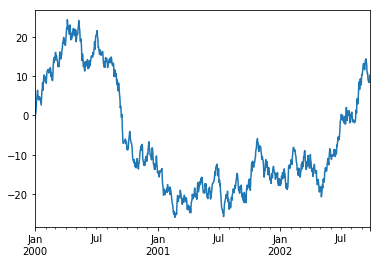

In [68]:
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()

在DataFrame上，```plot()```是一个函数可以方便地对数据的每个列进行绘图

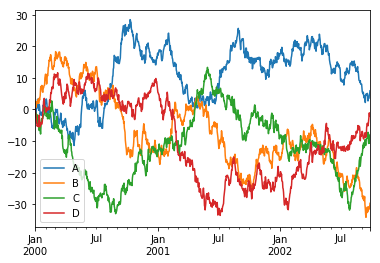

In [69]:
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
df=df.cumsum()
df.plot()


### 数据获取与导出
#### CSV
保存数据到csv文件中

In [70]:
df.to_csv('foo.csv')

从csv中读取数据

In [71]:
df=pd.read_csv('foo.csv')
print(df[:10])

   Unnamed: 0         A         B         C         D
0  2000-01-01  0.573685  0.254583 -1.007374  0.475982
1  2000-01-02  0.027795  2.640388 -0.866092 -1.642860
2  2000-01-03 -1.298852  2.205553 -1.189777 -1.829773
3  2000-01-04 -0.350564  0.717657 -1.497301 -3.179510
4  2000-01-05  1.732001  1.939669 -2.658425 -4.195840
5  2000-01-06  0.457319  2.281939 -1.612770 -4.582275
6  2000-01-07  0.571856  2.053347 -3.937807 -5.300862
7  2000-01-08  3.242640  2.280455 -4.378306 -5.054595
8  2000-01-09  2.884421  2.906835 -3.156276 -5.133953
9  2000-01-10  2.486527  3.205170 -3.407170 -5.450735


#### HDF5
生成HDF5存储（需要安装tables库 ```pip3 install tables```）

In [72]:
df.to_hdf('foo.h5','df')

从HDF5存储中读取数据

In [73]:
df=pd.read_hdf('foo.h5','df')
print(df[:10])

   Unnamed: 0         A         B         C         D
0  2000-01-01  0.573685  0.254583 -1.007374  0.475982
1  2000-01-02  0.027795  2.640388 -0.866092 -1.642860
2  2000-01-03 -1.298852  2.205553 -1.189777 -1.829773
3  2000-01-04 -0.350564  0.717657 -1.497301 -3.179510
4  2000-01-05  1.732001  1.939669 -2.658425 -4.195840
5  2000-01-06  0.457319  2.281939 -1.612770 -4.582275
6  2000-01-07  0.571856  2.053347 -3.937807 -5.300862
7  2000-01-08  3.242640  2.280455 -4.378306 -5.054595
8  2000-01-09  2.884421  2.906835 -3.156276 -5.133953
9  2000-01-10  2.486527  3.205170 -3.407170 -5.450735


#### Excel
生成Excel文件（需要安装openpyxl库```pip3 install openpyxl```）

In [74]:
df.to_excel('foo.xlsx',sheet_name='Sheet01')

从Excel中读取数据

In [75]:
print(pd.read_excel('foo.xlsx', 'Sheet01',
                    index_col=None, na_values=['NA'])[:10])

   Unnamed: 0         A         B         C         D
0  2000-01-01  0.573685  0.254583 -1.007374  0.475982
1  2000-01-02  0.027795  2.640388 -0.866092 -1.642860
2  2000-01-03 -1.298852  2.205553 -1.189777 -1.829773
3  2000-01-04 -0.350564  0.717657 -1.497301 -3.179510
4  2000-01-05  1.732001  1.939669 -2.658425 -4.195840
5  2000-01-06  0.457319  2.281939 -1.612770 -4.582275
6  2000-01-07  0.571856  2.053347 -3.937807 -5.300862
7  2000-01-08  3.242640  2.280455 -4.378306 -5.054595
8  2000-01-09  2.884421  2.906835 -3.156276 -5.133953
9  2000-01-10  2.486527  3.205170 -3.407170 -5.450735
